## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [71]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [73]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [74]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [76]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [77]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [81]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 1.2734 - acc: 0.6978 - val_loss: 0.8121 - val_acc: 0.8317
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.7196 - acc: 0.8388 - val_loss: 0.6089 - val_acc: 0.8607
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5896 - acc: 0.8591 - val_loss: 0.5267 - val_acc: 0.8731
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5269 - acc: 0.8683 - val_loss: 0.4807 - val_acc: 0.8801
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.4887 - acc: 0.8754 - val_loss: 0.4508 - val_acc: 0.8850
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.4625 - acc: 0.8802 - val_loss: 0.4290 - val_acc: 0.8895
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.4431 - acc: 0.8834 - val_loss: 0.4129 - val_acc

Test score: 0.3353978250801563
Test accuracy: 0.9099


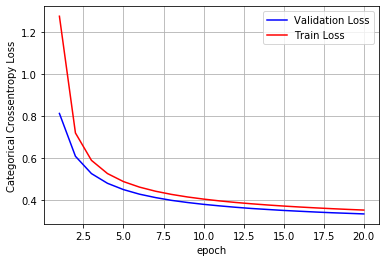

In [82]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [83]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_74 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_75 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.2744 - acc: 0.1890 - val_loss: 2.2350 - val_acc: 0.4947
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 2.1967 - acc: 0.4353 - val_loss: 2.1493 - val_acc: 0.5931
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 2.0976 - acc: 0.5767 - val_loss: 2.0299 - val_acc: 0.6617
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 1.9544 - acc: 0.6437 - val_loss: 1.8555 - val_acc: 0.7083
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.7552 - acc: 0.6784 - val_loss: 1.6280 - val_acc: 0.7205
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.5198 - acc: 0.7088 - val_loss: 1.3885 - val_acc: 0.7349
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.2967 - acc: 0.7363 - val_loss: 1.1846 - val_acc

Test score: 0.46791549773216246
Test accuracy: 0.8757


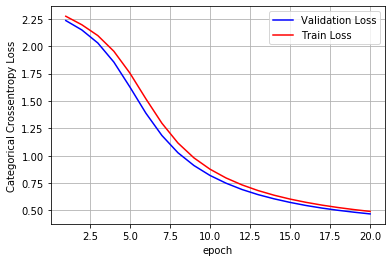

In [85]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

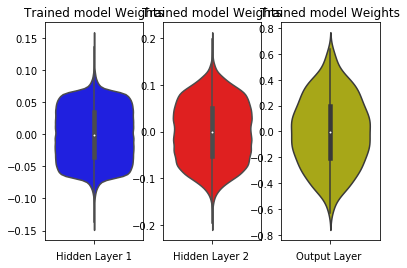

In [86]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [87]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_77 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5570 - acc: 0.8544 - val_loss: 0.2545 - val_acc: 0.9247
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2237 - acc: 0.9341 - val_loss: 0.1855 - val_acc: 0.9453
Epoch 3/20
60000/60000 [============================

Test score: 0.07117319775300347
Test accuracy: 0.9818


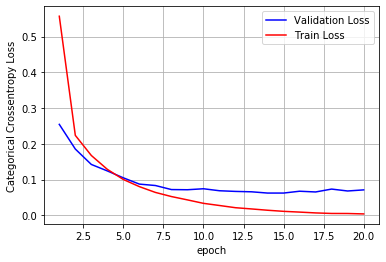

In [88]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

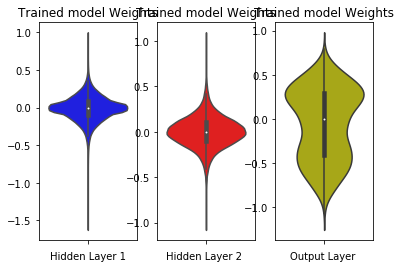

In [89]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [90]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_80 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_81 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.7332 - acc: 0.7892 - val_loss: 0.3822 - val_acc: 0.8934
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.3451 - acc: 0.9029 - val_loss: 0.2992 - val_acc: 0.9156
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2848 - acc: 0.9199 - val_loss: 0.2602 - val_acc: 0.9263
Epoch 4/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.2521 - acc: 0.9289 - val_loss: 0.2355 - val_acc: 0.9337
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.2292 - acc: 0.9354 - val_loss: 0.2198 - val_acc: 0.9378
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2114 - acc: 0.9406 - val_loss: 0.2052 - val_acc: 0.9415
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1973 - acc: 0.9440 - val_loss: 0.1934 - val_ac

Test score: 0.12485450383797288
Test accuracy: 0.9626


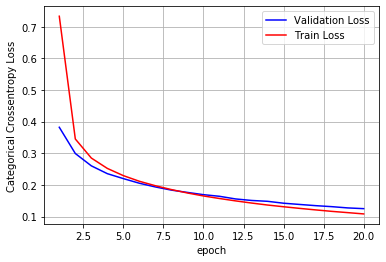

In [92]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

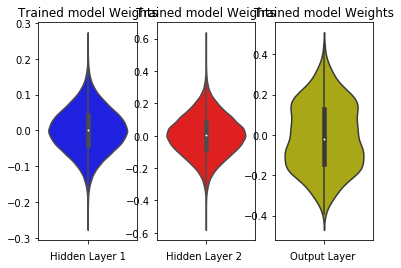

In [93]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [94]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_83 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_84 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2339 - acc: 0.9300 - val_loss: 0.1131 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0871 - acc: 0.9732 - val_loss: 0.0750 - val_acc: 0.9764
Epoch 3/20
60000/60000 [=======================

Test score: 0.09667216630082585
Test accuracy: 0.981


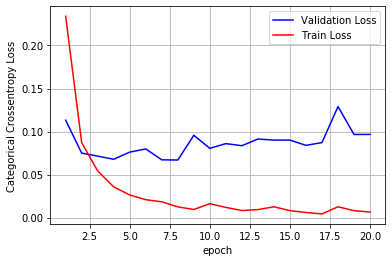

In [95]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

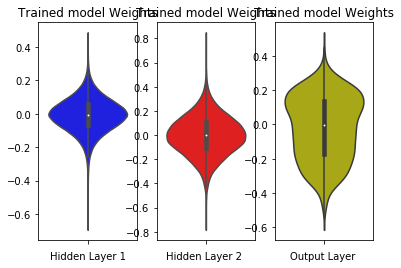

In [96]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [97]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dense_86 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_20 (Batc (None, 128)               512       
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [98]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.3000 - acc: 0.9114 - val_loss: 0.1998 - val_acc: 0.9409
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1724 - acc: 0.9485 - val_loss: 0.1622 - val_acc: 0.9529
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1333 - acc: 0.9608 - val_loss: 0.1498 - val_acc: 0.9553
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1097 - acc: 0.9679 - val_loss: 0.1372 - val_acc: 0.9584
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0934 - acc: 0.9725 - val_loss: 0.1245 - val_acc: 0.9625
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0797 - acc: 0.9754 - val_loss: 0.1160 - val_acc: 0.9664
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0699 - acc: 0.9779 - val_loss: 0.1168 - val_ac

Test score: 0.1047434159736731
Test accuracy: 0.9711


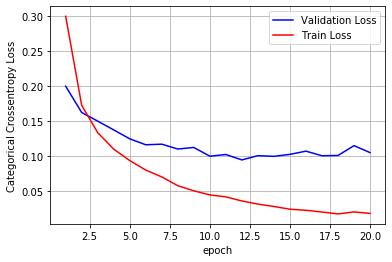

In [99]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

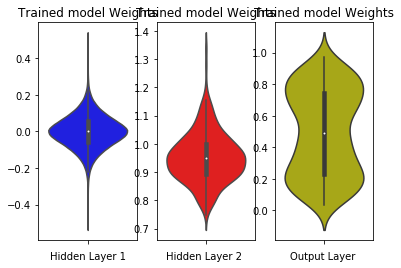

In [100]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [101]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 10)              

In [102]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.6779 - acc: 0.7916 - val_loss: 0.2975 - val_acc: 0.9120
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.4322 - acc: 0.8693 - val_loss: 0.2565 - val_acc: 0.9253
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3904 - acc: 0.8821 - val_loss: 0.2377 - val_acc: 0.9282
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3611 - acc: 0.8906 - val_loss: 0.2200 - val_acc: 0.9335
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3351 - acc: 0.8986 - val_loss: 0.2166 - val_acc: 0.9347
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3230 - acc: 0.9023 - val_loss: 0.2018 - val_acc: 0.9387
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3110 - acc: 0.9070 - val_loss: 0.1949 - val_ac

Test score: 0.10323964318521321
Test accuracy: 0.9691


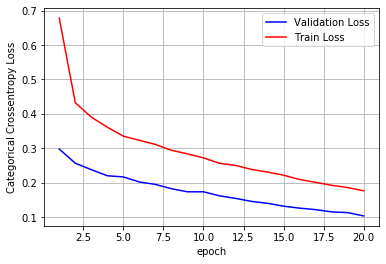

In [103]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

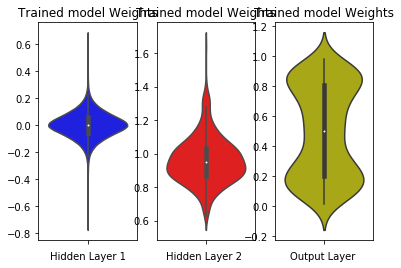

In [104]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [107]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977050 using {'activ': 'sigmoid'}
0.977050 (0.001843) with: {'activ': 'sigmoid'}
0.976917 (0.003238) with: {'activ': 'relu'}


<h2>**Assignment Tasks**:</h2>


<h2>Two layer architecture with Dropout+Batch Normalization with ReLU as activation unit and Adam optimiser</h2>

In [108]:

from keras.layers.normalization import BatchNormalization

model_twolayer = Sequential()
model_twolayer.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_twolayer.add(BatchNormalization())
model_twolayer.add(Dropout(0.5))

model_twolayer.add(Dense(52, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_twolayer.add(BatchNormalization())
model_twolayer.add(Dropout(0.5))

model_twolayer.add(Dense(output_dim, activation='softmax'))
model_twolayer.summary()



model_twolayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_twolayer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 364)               285740    
_________________________________________________________________
batch_normalization_23 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_19 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 52)                18980     
_________________________________________________________________
batch_normalization_24 (Batc (None, 52)                208       
_________________________________________________________________
dropout_20 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 10)              

In [109]:
model_twolayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_twolayer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0923 - acc: 0.9737 - val_loss: 0.0736 - val_acc: 0.9789
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0879 - acc: 0.9746 - val_loss: 0.0710 - val_acc: 0.9800
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0853 - acc: 0.9752 - val_loss: 0.0710 - val_acc: 0.9817
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0843 - acc: 0.9752 - val_loss: 0.0700 - val_acc: 0.9799
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0840 - acc: 0.9749 - val_loss: 0.0689 - val_acc: 0.9818
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0830 - acc: 0.9760 - val_loss: 0.0711 - val_acc: 0.9822
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0789 - acc: 0.9772 - val_loss: 0.0661 - val_a

Test score: 0.07015746749795508
Test accuracy: 0.9832


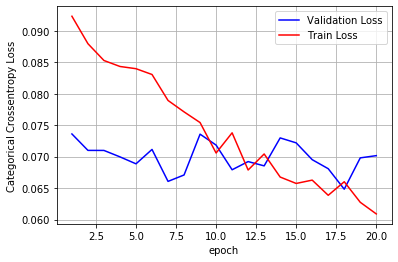

In [110]:
score = model_twolayer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>Three layer architecture with Dropout+Batch Normalization with ReLU as activation unit and Adam optimiser</h2>

In [111]:
model_threelayer = Sequential()
model_threelayer.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_threelayer.add(BatchNormalization())
model_threelayer.add(Dropout(0.5))

model_threelayer.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_threelayer.add(BatchNormalization())
model_threelayer.add(Dropout(0.5))

model_threelayer.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_threelayer.add(BatchNormalization())
model_threelayer.add(Dropout(0.5))

model_threelayer.add(Dense(output_dim, activation='softmax'))
model_threelayer.summary()



model_threelayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_threelayer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 128)               65664     
_________________________________________________________________
batch_normalization_26 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 32)              

In [112]:
model_threelayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_threelayer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.1199 - acc: 0.9701 - val_loss: 0.0827 - val_acc: 0.9802
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1142 - acc: 0.9709 - val_loss: 0.0862 - val_acc: 0.9805
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1136 - acc: 0.9714 - val_loss: 0.0812 - val_acc: 0.9807
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1077 - acc: 0.9727 - val_loss: 0.0819 - val_acc: 0.9807
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1095 - acc: 0.9722 - val_loss: 0.0832 - val_acc: 0.9819
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1066 - acc: 0.9723 - val_loss: 0.0809 - val_acc: 0.9813
Epoch 7/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1040 - acc: 0.9737 - val_loss: 0.0756 - val

Test score: 0.07649926883412991
Test accuracy: 0.9829


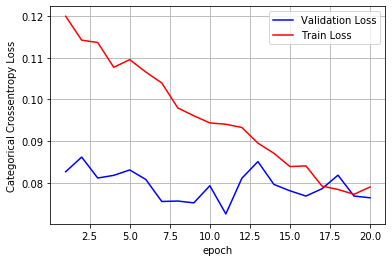

In [113]:
score = model_threelayer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>Five layer architecture with Dropout+Batch Normalization with ReLU as activation unit and Adam optimiser</h2>

In [114]:
model_fivelayer = Sequential()
model_fivelayer.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_fivelayer.add(BatchNormalization())
model_fivelayer.add(Dropout(0.5))

model_fivelayer.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_fivelayer.add(BatchNormalization())
model_fivelayer.add(Dropout(0.5))

model_fivelayer.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_fivelayer.add(BatchNormalization())
model_fivelayer.add(Dropout(0.5))

model_fivelayer.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1767, seed=None)) )
model_fivelayer.add(BatchNormalization())
model_fivelayer.add(Dropout(0.5))

model_fivelayer.add(Dense(32, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_fivelayer.add(BatchNormalization())
model_fivelayer.add(Dropout(0.5))

model_fivelayer.add(Dense(output_dim, activation='softmax'))
model_fivelayer.summary()



model_fivelayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_fivelayer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 128)             

In [115]:
model_fivelayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_fivelayer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1613 - acc: 0.9650 - val_loss: 0.1108 - val_acc: 0.9792
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.1638 - acc: 0.9651 - val_loss: 0.1059 - val_acc: 0.9796
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1574 - acc: 0.9658 - val_loss: 0.1118 - val_acc: 0.9788
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1529 - acc: 0.9671 - val_loss: 0.1101 - val_acc: 0.9791
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1519 - acc: 0.9663 - val_loss: 0.1039 - val_acc: 0.9814
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.1514 - acc: 0.9669 - val_loss: 0.1083 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.1432 - acc: 0.9685 - val_loss: 0.1056 -

Test score: 0.09801922237295657
Test accuracy: 0.9836


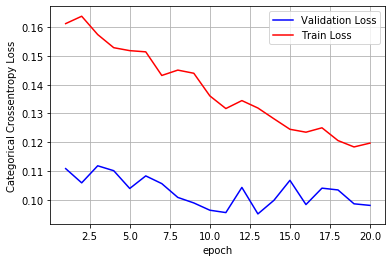

In [116]:
score = model_fivelayer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [117]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["No of layers", "Model", "Test Accuracy"]
x.add_row(["2", "Sigmoid+SGD", 0.8757])
x.add_row(["2", "Sigmoid+Adam", 0.9818])
x.add_row(["2", "Relu+SGD", 0.9626])
x.add_row(["2", "Relu+adam", 0.981])
x.add_row(["2", "Relu+BN+Adam", 0.9711])
x.add_row(["2", "Dropout+Adam", 0.9691])
x.add_row(["2", "BN+Dropout+Relu+Adam",0.9832])
x.add_row(["3", "BN+Dropout+Relu+Adam",0.9829])
x.add_row(["5", "BN+Dropout+Relu+Adam",0.9836])
print(x)

+--------------+----------------------+---------------+
| No of layers |        Model         | Test Accuracy |
+--------------+----------------------+---------------+
|      2       |     Sigmoid+SGD      |     0.8757    |
|      2       |     Sigmoid+Adam     |     0.9818    |
|      2       |       Relu+SGD       |     0.9626    |
|      2       |      Relu+adam       |     0.981     |
|      2       |     Relu+BN+Adam     |     0.9711    |
|      2       |     Dropout+Adam     |     0.9691    |
|      2       | BN+Dropout+Relu+Adam |     0.9832    |
|      3       | BN+Dropout+Relu+Adam |     0.9829    |
|      5       | BN+Dropout+Relu+Adam |     0.9836    |
+--------------+----------------------+---------------+
